# The Held Out Set and Model Selection

We can fit data using models in a given hypothesis set, say, ${
\cal H_3}$. This the set of all cubics. But how do we choose the "correct" hypothesis set, that is, the hypothesis set which has a model which gives is the least training error or cost?

This process is called **model selection**, and for this we need a hold out set.

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def make_simple_plot():
    fig, axes=plt.subplots(figsize=(12,5), nrows=1, ncols=2);
    axes[0].set_ylabel("$y$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([-2,2])
    axes[1].set_ylim([-2,2])
    plt.tight_layout();
    return axes
def make_plot():
    fig, axes=plt.subplots(figsize=(20,8), nrows=1, ncols=2);
    axes[0].set_ylabel("$p_R$")
    axes[0].set_xlabel("$x$")
    axes[1].set_xlabel("$x$")
    axes[1].set_yticklabels([])
    axes[0].set_ylim([0,1])
    axes[1].set_ylim([0,1])
    axes[0].set_xlim([0,1])
    axes[1].set_xlim([0,1])
    plt.tight_layout();
    return axes

## Revisiting the model

Let $x$ be the fraction of religious people in a county and $y$ be the probability of voting for Romney as a function of $x$. In other words $y_i$ is data that pollsters have taken which tells us their estimate of people voting for Romney and $x_i$ is the fraction of religious people in county $i$. Because poll samples are finite, there is a margin of error on each data point or county $i$, but we will ignore that for now.

Let us assume that we have a "population" of 200 counties $x$:

In [3]:
dffull=pd.read_csv("data/religion.csv")
dffull.head()

,promney,rfrac
0,0.047790,0.00
1,0.051199,0.01
2,0.054799,0.02
3,0.058596,0.03
4,0.062597,0.04


Lets suppose now that the Lord came by and told us that the points in the plot below captures $f(x)$ exactly. 

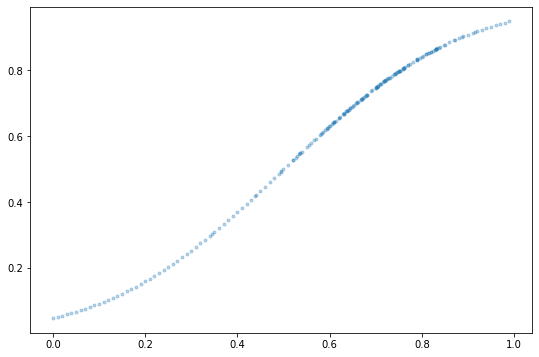

In [5]:
plt.figure(figsize = (9,6))
x=dffull.rfrac.values
f=dffull.promney.values
plt.plot(x,f,'.', alpha=0.3)

Notice that our sampling of $x$ is not quite uniform: there are more points around $x$ of 0.7.

Now, in real life we are only given a sample of points. Lets assume that out of this population of 200 points we are given a sample $\cal{D}$ of 30 data points. Such data is called **in-sample data**. Contrastingly, the entire population of data points is also called **out-of-sample data**.

In [6]:
df = pd.read_csv("data/noisysample.csv")
df.head()

,f,i,x,y
0,0.075881,7,0.07,0.138973
1,0.085865,9,0.09,0.050510
2,0.096800,11,0.11,0.183821
3,0.184060,23,0.23,0.057621
4,0.285470,33,0.33,0.358174


## Testing and Training Sets

The process of learning has two parts:

1. Fit for a model by minimizing the in-sample risk
2. Hope that the in-sample risk approximates the out-of-sample risk well.

Mathematically, we are saying that:

$$
\begin{eqnarray*}
A &:& R_{\cal{D}}(g) \,\,smallest\,on\,\cal{H}\\
B &:& R_{out \,of \,sample} (g) \approx R_{\cal{D}}(g)
\end{eqnarray*}
$$

Hoping does not befit us as scientists. How can we test that the in-sample risk approximates the out-of-sample risk well?

The "aha" moment comes when we realize that we can **hold back** some of our sample, and test the performance of our learner by trying it out on this held back part! Perhaps we can compute the error or risk on the held-out part, or "test" part of our sample, and have something to say about the out-of-sample error.

Let us introduce some new terminology. We take the sample of data $\cal{D}$ that we have been given (our in-sample set) and split it into two parts:

1. The **training set**, which is the part of the data we use to fit a model
2. The **testing set**, a smaller part of the data set which we use to see how good our fit was.

This split is done by choosing points at random into these two sets. Typically we might take 80% of our data and put it in the training set, with the remaining amount going into the test set. This can be carried out in python using the `train_test_split` function from `sklearn.model_selection`.

The split is shown in the diagram below:

![m:caption](images/train-test.png)

We **ARE taking a hit** on the amount of data we have to train our model. The more data we have, the better we can do for our fits. But, you cannot figure out the generalization ability of a learner by looking at the same data it was trained on: there is nothing to generalize to, and as we know we can fit very complex models to training data which have no hope of generalizing (like an interpolator). Thus, to estimate the **out-of-sample error or risk**, we must leave data over to make this estimation. 

At this point you are thinking: the test set is just another sample of the population, just like the training set. What guarantee do we have that it approximates the out-of-sample error well? And furthermore, if we pick 6 out of 30 points as a test set, why would you expect the estimate to be any good?

It can be shown that the test set error is a good estimate of the out of sample error, especially for larger and larger test sets. You are right to worry that 6 points is perhaps too few, but thats what we have for now, and we shall work with them. This is the subject of complexity theory.

We are **using the training set then, as our in-sample set, and the test set as a proxy for out-of-sample.**.

In [8]:
from sklearn.model_selection import train_test_split
datasize=df.shape[0]
#split dataset using the index, as we have x,f, and y that we want to split.
itrain,itest = train_test_split(range(30),train_size=24, test_size=6)
xtrain= df.x[itrain].values
ftrain = df.f[itrain].values
ytrain = df.y[itrain].values
xtest= df.x[itest].values
ftest = df.f[itest].values
ytest = df.y[itest].values

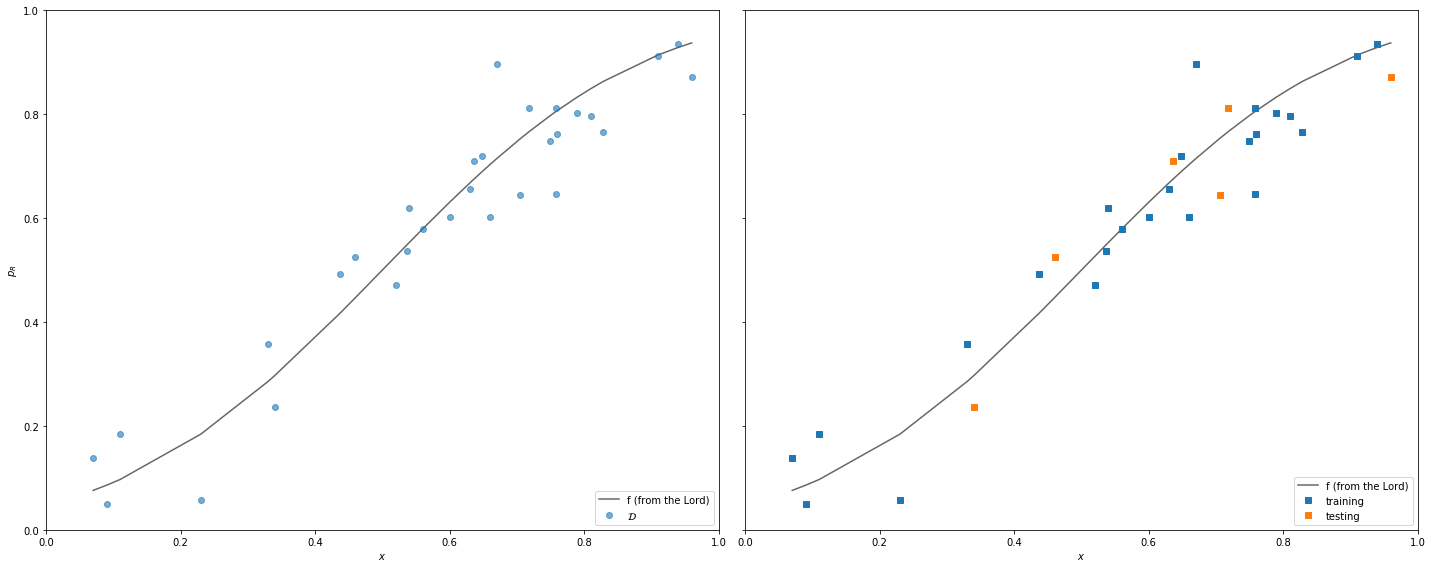

In [9]:
axes=make_plot()
axes[0].plot(df.x,df.f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[0].plot(df.x,df.y, 'o',alpha=0.6, label="$\cal{D}$");
axes[1].plot(df.x,df.f, 'k-', alpha=0.6, label="f (from the Lord)");
axes[1].plot(xtrain, ytrain, 's', label="training")
axes[1].plot(xtest, ytest, 's', label="testing")
axes[0].legend(loc="lower right")
axes[1].legend(loc="lower right")

In [10]:
def make_features(train_set, test_set, degrees):
    traintestlist=[]
    for d in degrees:
        traintestdict={}
        traintestdict['train'] = PolynomialFeatures(d).fit_transform(train_set.reshape(-1,1))
        traintestdict['test'] = PolynomialFeatures(d).fit_transform(test_set.reshape(-1,1))
        traintestlist.append(traintestdict)
    return traintestlist

## How do training and testing error change with complexity?

You will recall that the big question we were left with earlier is: what order of polynomial should we use to fit the data? Which order is too biased? Which one has too much variance and is too complex? Let us try and answer this question.

We do this by fitting many different models (remember the fit is made by minimizing the empirical risk on the training set), each with increasing dimension `d`, and looking at the training-error and the test-error in each of these models. So we first try $\cal{H}_0$, then $\cal{H}_1$, then $\cal{H}_2$, and so on.

So, for increasing polynomial degree, and thus feature dimension `d`, we fit a `LinearRegression` model on the traing set. We then use scikit-learn again to calculate the error or risk. We calculate the `mean_squared_error` between the model's predictions and the data, BOTH on the training set and test set. We plot this error as a function of the defree of the polynomial `d`.

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
degrees=range(21)
error_train=np.empty(len(degrees))
error_test=np.empty(len(degrees))

traintestlists=make_features(xtrain, xtest, degrees)

Example:

In [13]:
traintestlists[3]['train'], ytrain

(array([[1.00000000e+00, 5.20000000e-01, 2.70400000e-01, 1.40608000e-01],
        [1.00000000e+00, 5.35968243e-01, 2.87261957e-01, 1.53963286e-01],
        [1.00000000e+00, 9.40000000e-01, 8.83600000e-01, 8.30584000e-01],
        [1.00000000e+00, 7.58682543e-01, 5.75599200e-01, 4.36697065e-01],
        [1.00000000e+00, 7.90000000e-01, 6.24100000e-01, 4.93039000e-01],
        [1.00000000e+00, 1.10000000e-01, 1.21000000e-02, 1.33100000e-03],
        [1.00000000e+00, 7.49902667e-01, 5.62354010e-01, 4.21710772e-01],
        [1.00000000e+00, 6.70000000e-01, 4.48900000e-01, 3.00763000e-01],
        [1.00000000e+00, 9.10000000e-01, 8.28100000e-01, 7.53571000e-01],
        [1.00000000e+00, 8.09657516e-01, 6.55545293e-01, 5.30767174e-01],
        [1.00000000e+00, 6.48325909e-01, 4.20326484e-01, 2.72508550e-01],
        [1.00000000e+00, 6.00000000e-01, 3.60000000e-01, 2.16000000e-01],
        [1.00000000e+00, 6.30713611e-01, 3.97799659e-01, 2.50897660e-01],
        [1.00000000e+00, 7.00000000e-0

In [14]:
traintestlists[3]['test'], ytest

(array([[1.        , 0.71829603, 0.51594919, 0.37060426],
        [1.        , 0.70533267, 0.49749418, 0.3508989 ],
        [1.        , 0.96      , 0.9216    , 0.884736  ],
        [1.        , 0.46      , 0.2116    , 0.097336  ],
        [1.        , 0.34      , 0.1156    , 0.039304  ],
        [1.        , 0.63633949, 0.40492794, 0.25767164]]),
 array([0.81167767, 0.64431987, 0.87217807, 0.52531463, 0.23599998,
        0.71040586]))

### Estimating the out-of-sample error

We can then use `mean_squared_error` from `sklearn` to calculate the error between the predictions and actual `ytest` values. Below we calculate this error on both the training set (which we already fit on) and the test set (which we hadnt seen before), and plot how these errors change with the degree of the polynomial.

In [15]:
est3 = LinearRegression(fit_intercept=False)
est3.fit(traintestlists[3]['train'], ytrain)
pred_on_train3=est3.predict(traintestlists[3]['train'])
pred_on_test3=est3.predict(traintestlists[3]['test'])

In [16]:
print("errtrain",mean_squared_error(ytrain, pred_on_train3))
print("errtest",mean_squared_error(ytest, pred_on_test3))

errtrain 0.00518797277855692
errtest 0.004555705787204705


Let us now do this for a polynomial of degree 19

In [17]:
est19 = LinearRegression(fit_intercept=False)
est19.fit(traintestlists[19]['train'], ytrain)
pred_on_train19=est19.predict(traintestlists[19]['train'])
pred_on_test19=est19.predict(traintestlists[19]['test'])
print("errtrain",mean_squared_error(ytrain, pred_on_train19))
print("errtest",mean_squared_error(ytest, pred_on_test19))

errtrain 0.0019376244535547237
errtest 123960.37984119589


You can see that the test set error is larger, corresponding to an overfit model thats doing very well on some points and awful on other.


## Finding the appropriate complexity

Lets now carry out this minimization systematically for each polynomial degree d.

In [18]:
for d in degrees:#for increasing polynomial degrees 0,1,2...
    Xtrain = traintestlists[d]['train']
    Xtest = traintestlists[d]['test']
    #set up model
    #fit
    #predict
    #calculate mean squared error
    #set up model
    est = LinearRegression(fit_intercept=False)
    #fit
    est.fit(Xtrain, ytrain)
    #predict
    prediction_on_training = est.predict(Xtrain)
    prediction_on_test = est.predict(Xtest)
    #calculate mean squared error
    error_train[d] = mean_squared_error(ytrain, prediction_on_training)
    error_test[d] = mean_squared_error(ytest, prediction_on_test)

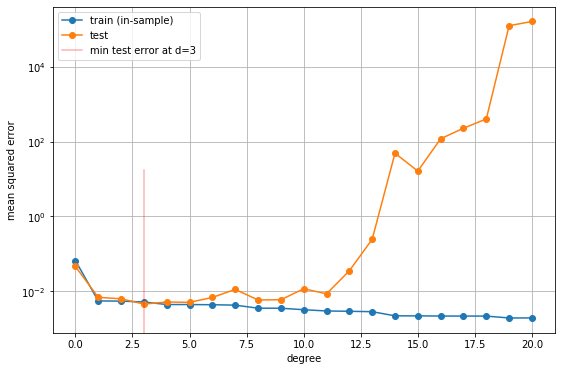

In [20]:
plt.figure(figsize = (9,6))
plt.plot(degrees, error_train, marker='o', label='train (in-sample)')
plt.plot(degrees, error_test, marker='o', label='test')
plt.axvline(np.argmin(error_test), 0,0.5, color='r', label="min test error at d=%d"%np.argmin(error_test), alpha=0.3)
plt.ylabel('mean squared error')
plt.xlabel('degree')
plt.legend(loc='upper left')
plt.yscale("log")
plt.grid()

The graph shows a very interesting structure. The training error decreases with increasing degree of the polynomial. This ought to make sense given what you know now: one can construct an arbitrarily complex polynomial to fit all the training data: indeed one could construct an order 24 polynomial which perfectly interpolates the 24 data points in the training set. You also know that this would do very badly on the test set as it would wiggle like mad to capture all the data points. And this is indeed what we see in the test set error. 

For extremely low degree polynomials like $d=0$ a flat line capturing the mean value of the data or $d=1$ a straight line fitting the data, the polynomial is not curvy enough to capturve the curves of the data. We are in the bias/deterministic error regime, where we will always have some difference between the data and the fit since the hypothesis is too simple. But, for degrees higher than 10 or so, the polynomial starts to wiggle too much to capture the training data. The test set error increases as the predictive power of the polynomial goes down thanks to the contortions it must endure to fit the training data.



In a long shallow trough at the bottom almost any polynomial model will do well.

Thus the test set error first decreases as the model get more expressive, and then, once we exceed a certain level of complexity (here indexed by $d$), it increases. This idea can be used to identify just the right amount of complexity in the model by picking as **the best hypothesis as the one that minimizes test set error** or risk. In our case this happens around $d=1-4$. (This exact number will depend on the random points chosen into the training and test sets) For complexity lower than this critical value, identified by the red vertical line in the diagram, the hypotheses underfit; for complexity higher, they overfit.

![m:caption](images/complexity-error-plot.png)

Keep in mind that as you see in the plot above this minimum can be shallow: in this case any of the low order polynomials would be "good enough". Think why you might want to go as left as you can.

## Is this still a test set?

But something should be troubling you about this discussion. We have made no discussion on the error bars on our error estimates, primarily because we have not carried out any resampling to make this possible. 

But secondly we seem to be "visually fitting" a value of $d$. It cant be kosher to use as a test set something you did some fitting on...

We have contaminated our test set. The moment we **use it in the learning process, it is not a test set**.

The answer to the second question is to use a validation set, and leave a separate test set aside. The answer to the first is to use cross-validation, which is a kind of resampling method that uses multiple validation sets!